In [1]:
# Trying out the Hinode/XRT temperature responses in python
# 
# 28-Oct 2020 IGH
# 
# These were created in sswidl, see make_xrttresp_forpy.pro
# Also see the XRT analysis guide, Chapter 2 https://xrt.cfa.harvard.edu/resources/documents/XAG/XAG.pdf

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.time
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

In [3]:
tr_sep18=io.readsav('xrt_tresp_20180928.dat')
tr_apr19=io.readsav('xrt_tresp_20190425.dat')
tr_feb20=io.readsav('xrt_tresp_20200221.dat')
tr_sep20=io.readsav('xrt_tresp_20200912.dat')

logt=tr_sep18['logt']
filters=tr_sep18['filters']
filters[0]=filters[0].decode('utf-8')
filters[1]=filters[1].decode('utf-8')
print(filters)
units=tr_sep18['units'].decode('utf-8')
print(units)
date_sep18=astropy.time.Time(tr_sep18['date'].decode('utf-8'), format = 'isot')
print(date_sep18.iso[:10])

['Al-poly' 'Be-thin']
DN cm^5 s^-1 pix^-1
2018-09-28


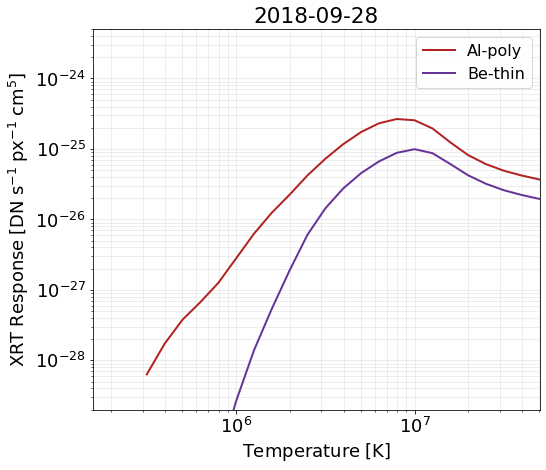

In [4]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 7))

clrs=['firebrick','rebeccapurple']

plt.loglog(10**logt,tr_sep18['tr'][0],label=filters[0],color=clrs[0],lw=2)
plt.loglog(10**logt,tr_sep18['tr'][1],label=filters[1],color=clrs[1],lw=2)
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$\mathrm{XRT\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([2e-29,5e-24])
plt.xlim([10**5.2,10**7.7])
plt.title(date_sep18.iso[:10])
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()



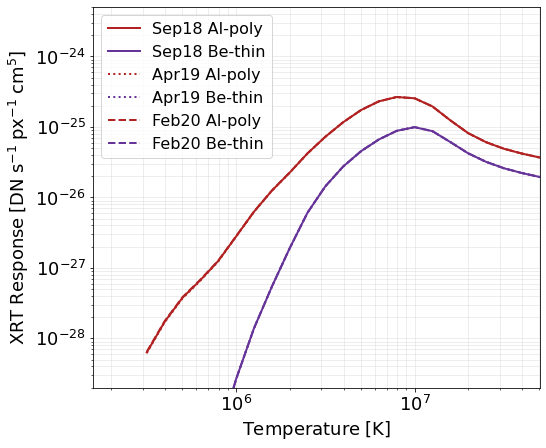

In [5]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 7))

clrs=['firebrick','rebeccapurple']

plt.loglog(10**logt,tr_sep18['tr'][0],label='Sep18 '+filters[0],color=clrs[0],lw=2)
plt.loglog(10**logt,tr_sep18['tr'][1],label='Sep18 '+filters[1],color=clrs[1],lw=2)
plt.loglog(10**logt,tr_apr19['tr'][0],label='Apr19 '+filters[0],color=clrs[0],lw=2,ls='dotted')
plt.loglog(10**logt,tr_apr19['tr'][1],label='Apr19 '+filters[1],color=clrs[1],lw=2,ls='dotted')
plt.loglog(10**logt,tr_feb20['tr'][0],label='Feb20 '+filters[0],color=clrs[0],lw=2,ls='dashed')
plt.loglog(10**logt,tr_feb20['tr'][1],label='Feb20 '+filters[1],color=clrs[1],lw=2,ls='dashed')
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$\mathrm{XRT\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([2e-29,5e-24])
plt.xlim([10**5.2,10**7.7])
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()

# So contamination not changing much over this time range?
# https://hesperia.gsfc.nasa.gov/ssw/hinode/xrt/idl/response/contam/xrt_contam_on_ccd.pdf

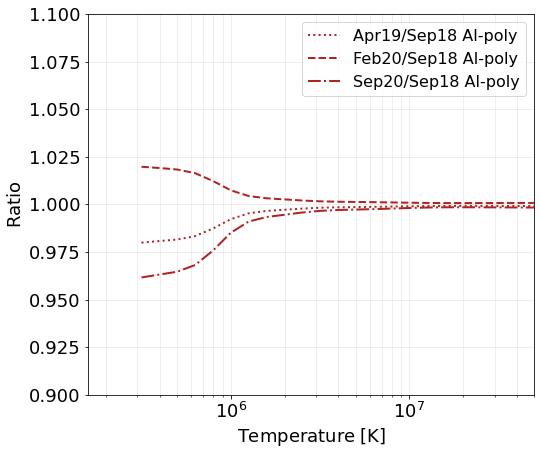

In [6]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 7))

clrs=['firebrick','rebeccapurple']

plt.semilogx(10**logt,tr_apr19['tr'][0]/tr_sep18['tr'][0],\
             label='Apr19/Sep18 '+filters[0],color=clrs[0],lw=2,ls='dotted')
plt.semilogx(10**logt,tr_feb20['tr'][0]/tr_sep18['tr'][0],\
             label='Feb20/Sep18 '+filters[0],color=clrs[0],lw=2,ls='dashed')
plt.semilogx(10**logt,tr_sep20['tr'][0]/tr_sep18['tr'][0],\
             label='Sep20/Sep18 '+filters[0],color=clrs[0],lw=2,ls='dashdot')
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$\mathrm{Ratio}$')
plt.ylim([0.9,1.1])
plt.xlim([10**5.2,10**7.7])
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()
# So just a slight change over this time range?